In [72]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

# 1 Download Images And Filter Out Bad Ones

In [73]:
class_name = ['platic bottle', 'glass bottle', 'ink cartridge', 'cardboard box', 'plastic bag', 'paper bag', 'magazine', 'plastic utensil', 'battery', 'soda can', 'other aluminum can', 'aerosol', 'food can']

In [74]:
class_name = sorted(class_name)

In [75]:
class_name

['aerosol',
 'battery',
 'cardboard box',
 'food can',
 'glass bottle',
 'ink cartridge',
 'magazine',
 'other aluminum can',
 'paper bag',
 'plastic bag',
 'plastic utensil',
 'platic bottle',
 'soda can']

In [76]:
# Remove Dodgy Images
import cv2
import imghdr

In [77]:
dataset_dir = './dataset'
image_extensions = ['jpg', '.jpeg', 'png', 'bmp']

In [81]:
for image_class in os.listdir(dataset_dir): 
    for image in os.listdir(os.path.join(dataset_dir, image_class)):
        image_path = os.path.join(dataset_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_extensions: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


In [82]:
# Load data
data = tf.keras.utils.image_dataset_from_directory('dataset')

Found 110 files belonging to 12 classes.


In [83]:
data_iterator = data.as_numpy_iterator()

In [84]:
batch = data_iterator.next()

2023-03-02 13:15:10.599561: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-03-02 13:15:10.727445: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-03-02 13:15:11.151051: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-03-02 13:15:11.172673: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-03-02 13:15:11.182456: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-03-02 13:15:11.233956: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-03-02 13:15:11.289892: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


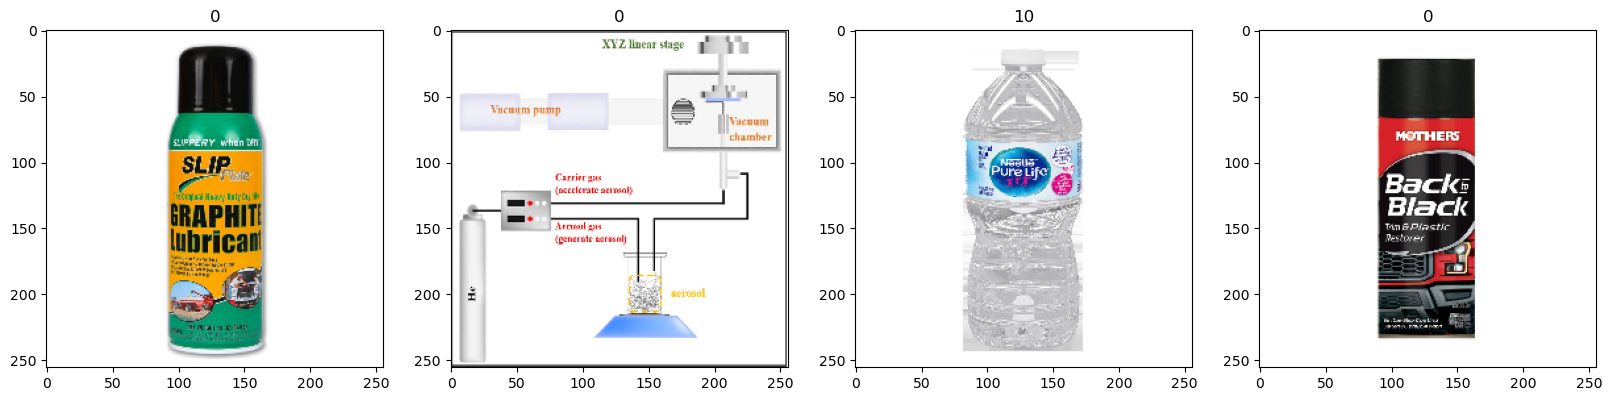

In [85]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])
    ax[idx].set_xlabel(class_name[batch[1][idx]])